<a href="https://colab.research.google.com/github/abekek/Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks/blob/main/Statistics_Calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting Google Drive (code)

In [1]:
# if running on collaboratory set = True
collaboratory = True

if collaboratory:
    from google.colab import drive
    drive.mount('/content/drive')
else: 
    print('Running on local systems, if running on collaboratory please change above')

Mounted at /content/drive


In [2]:
# changes directory to your main google drive folder
%cd drive/My\ Drive

/content/drive/My Drive


In [3]:
# Checks if the directory exists
import os
if os.path.exists("./Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks"):
    pass
else:
    !git clone https://github.com/abekek/Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks.git

In [4]:
# moves to the right directory
%cd Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks

/content/drive/My Drive/Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks


In [5]:
# checks if the directory is up to date
!git pull

Already up to date.


# AdaHessian Stats Computation

In [6]:
with open('./data/benchmark/AdaHessian Benchmarking.txt') as file_in:
  bs_64 = {}
  bs_128 = {}
  bs_256 = {}
  bs_512 = {}
  bs_1024 = {}
  batch_size = 0
  for line in file_in:
    if 'batch' in line:
      batch_size = int(line.split(' ')[-1])
    elif 'epochs' in line:
      epochs = int(line.split(' ')[-1])
      if batch_size == 64:
        epochs_arr = bs_64.get('epochs', [])
        epochs_arr.append(epochs)
        bs_64['epochs'] = epochs_arr
      elif batch_size == 128:
        epochs_arr = bs_128.get('epochs', [])
        epochs_arr.append(epochs)
        bs_128['epochs'] = epochs_arr
      elif batch_size == 256:
        epochs_arr = bs_256.get('epochs', [])
        epochs_arr.append(epochs)
        bs_256['epochs'] = epochs_arr
      elif batch_size == 512:
        epochs_arr = bs_512.get('epochs', [])
        epochs_arr.append(epochs)
        bs_512['epochs'] = epochs_arr
      elif batch_size == 1024:
        epochs_arr = bs_1024.get('epochs', [])
        epochs_arr.append(epochs)
        bs_1024['epochs'] = epochs_arr
    elif 'loops' in line:
      loops_mse = float(line.split(' ')[-1])
      if batch_size == 64:
        loops_arr = bs_64.get('loops_mse', [])
        loops_arr.append(loops_mse)
        bs_64['loops_mse'] = loops_arr
      elif batch_size == 128:
        loops_arr = bs_128.get('loops_mse', [])
        loops_arr.append(loops_mse)
        bs_128['loops_mse'] = loops_arr
      elif batch_size == 256:
        loops_arr = bs_256.get('loops_mse', [])
        loops_arr.append(loops_mse)
        bs_256['loops_mse'] = loops_arr
      elif batch_size == 512:
        loops_arr = bs_512.get('loops_mse', [])
        loops_arr.append(loops_mse)
        bs_512['loops_mse'] = loops_arr
      elif batch_size == 1024:
        loops_arr = bs_1024.get('loops_mse', [])
        loops_arr.append(loops_mse)
        bs_1024['loops_mse'] = loops_arr
    elif 'scaled' in line:
      params_mse = float(line.split(' ')[-1])
      if batch_size == 64:
        params_arr = bs_64.get('params_mse', [])
        params_arr.append(params_mse)
        bs_64['params_mse'] = params_arr
      elif batch_size == 128:
        params_arr = bs_128.get('params_mse', [])
        params_arr.append(params_mse)
        bs_128['params_mse'] = params_arr
      elif batch_size == 256:
        params_arr = bs_256.get('params_mse', [])
        params_arr.append(params_mse)
        bs_256['params_mse'] = params_arr
      elif batch_size == 512:
        params_arr = bs_512.get('params_mse', [])
        params_arr.append(params_mse)
        bs_512['params_mse'] = params_arr
      elif batch_size == 1024:
        params_arr = bs_1024.get('params_mse', [])
        params_arr.append(params_mse)
        bs_1024['params_mse'] = params_arr

In [7]:
bs_64_mins = sorted(range(len(bs_64['params_mse'])), key = lambda sub: bs_64['params_mse'][sub])[:5]
bs_128_mins = sorted(range(len(bs_128['params_mse'])), key = lambda sub: bs_128['params_mse'][sub])[:5]
bs_256_mins = sorted(range(len(bs_256['params_mse'])), key = lambda sub: bs_256['params_mse'][sub])[:5]
bs_512_mins = sorted(range(len(bs_512['params_mse'])), key = lambda sub: bs_512['params_mse'][sub])[:5]
bs_1024_mins = sorted(range(len(bs_1024['params_mse'])), key = lambda sub: bs_1024['params_mse'][sub])[:5]

In [8]:
bs_128_mins

[9, 8, 5, 6, 1]

In [9]:
import statistics 
import numpy as np

In [10]:
epochs_64_stats = np.array([bs_64['epochs'][x] for x in bs_64_mins])
epochs_128_stats = np.array([bs_128['epochs'][x] for x in bs_128_mins])
epochs_256_stats = np.array([bs_256['epochs'][x] for x in bs_256_mins])
epochs_512_stats = np.array([bs_512['epochs'][x] for x in bs_512_mins])
epochs_1024_stats = np.array([bs_1024['epochs'][x] for x in bs_1024_mins])

In [11]:
print(f"Standard Deviation of epochs of 64: %.1f "% (statistics.stdev(epochs_64_stats)))
print(f"Mean of of epochs of 64: %.1f " % (statistics.mean(epochs_64_stats)))

print(f"Standard Deviation of epochs of 128: %.1f "% (statistics.stdev(epochs_128_stats)))
print(f"Mean of of epochs of 128: %.1f " % (statistics.mean(epochs_128_stats)))

print(f"Standard Deviation of epochs of 256: %.1f "% (statistics.stdev(epochs_256_stats)))
print(f"Mean of of epochs of 256: %.1f " % (statistics.mean(epochs_256_stats)))

print(f"Standard Deviation of epochs of 512: %.1f "% (statistics.stdev(epochs_512_stats)))
print(f"Mean of of epochs of 512: %.1f " % (statistics.mean(epochs_512_stats)))

print(f"Standard Deviation of epochs of 1024: %.1f "% (statistics.stdev(epochs_1024_stats)))
print(f"Mean of of epochs of 1024: %.1f " % (statistics.mean(epochs_1024_stats)))

Standard Deviation of epochs of 64: 1.0 
Mean of of epochs of 64: 292.0 
Standard Deviation of epochs of 128: 0.0 
Mean of of epochs of 128: 500.0 
Standard Deviation of epochs of 256: 2.4 
Mean of of epochs of 256: 647.0 
Standard Deviation of epochs of 512: 7.4 
Mean of of epochs of 512: 735.0 
Standard Deviation of epochs of 1024: 0.0 
Mean of of epochs of 1024: 387.0 


In [12]:
loops_mse_64_stats = np.array([bs_64['loops_mse'][x] for x in bs_64_mins])
loops_mse_128_stats = np.array([bs_128['loops_mse'][x] for x in bs_128_mins])
loops_mse_256_stats = np.array([bs_256['loops_mse'][x] for x in bs_256_mins])
loops_mse_512_stats = np.array([bs_512['loops_mse'][x] for x in bs_512_mins])
loops_mse_1024_stats = np.array([bs_1024['loops_mse'][x] for x in bs_1024_mins])

In [13]:
print(f"Standard Deviation of LOOPS MSE of 64: %.5f "% (statistics.stdev(loops_mse_64_stats)))
print(f"Mean of of LOOPS MSE of 64: %.5f " % (statistics.mean(loops_mse_64_stats)))

print(f"Standard Deviation of LOOPS MSE of 128: %.5f "% (statistics.stdev(loops_mse_128_stats)))
print(f"Mean of of LOOPS MSE of 128: %.5f " % (statistics.mean(loops_mse_128_stats)))

print(f"Standard Deviation of LOOPS MSE of 256: %.5f "% (statistics.stdev(loops_mse_256_stats)))
print(f"Mean of of LOOPS MSE of 256: %.5f " % (statistics.mean(loops_mse_256_stats)))

print(f"Standard Deviation of LOOPS MSE of 512: %.5f "% (statistics.stdev(loops_mse_512_stats)))
print(f"Mean of of LOOPS MSE of 512: %.5f " % (statistics.mean(loops_mse_512_stats)))

print(f"Standard Deviation of LOOPS MSE of 1024: %.5f "% (statistics.stdev(loops_mse_1024_stats)))
print(f"Mean of of LOOPS MSE of 1024: %.5f " % (statistics.mean(loops_mse_1024_stats)))

Standard Deviation of LOOPS MSE of 64: 0.00132 
Mean of of LOOPS MSE of 64: 0.00975 
Standard Deviation of LOOPS MSE of 128: 0.00027 
Mean of of LOOPS MSE of 128: 0.00803 
Standard Deviation of LOOPS MSE of 256: 0.00361 
Mean of of LOOPS MSE of 256: 0.01155 
Standard Deviation of LOOPS MSE of 512: 0.00537 
Mean of of LOOPS MSE of 512: 0.01340 
Standard Deviation of LOOPS MSE of 1024: 0.01630 
Mean of of LOOPS MSE of 1024: 0.02671 


In [14]:
params_mse_64_stats = np.array([bs_64['params_mse'][x] for x in bs_64_mins])
params_mse_128_stats = np.array([bs_128['params_mse'][x] for x in bs_128_mins])
params_mse_256_stats = np.array([bs_256['params_mse'][x] for x in bs_256_mins])
params_mse_512_stats = np.array([bs_512['params_mse'][x] for x in bs_512_mins])
params_mse_1024_stats = np.array([bs_1024['params_mse'][x] for x in bs_1024_mins])

In [15]:
print(f"Standard Deviation of PARAMS MSE of 64: %.5f "% (statistics.stdev(params_mse_64_stats)))
print(f"Mean of of PARAMS MSE of 64: %.5f " % (statistics.mean(params_mse_64_stats)))

print(f"Standard Deviation of PARAMS MSE of 128: %.5f "% (statistics.stdev(params_mse_128_stats)))
print(f"Mean of of PARAMS MSE of 128: %.5f " % (statistics.mean(params_mse_128_stats)))

print(f"Standard Deviation of PARAMS MSE of 256: %.5f "% (statistics.stdev(params_mse_256_stats)))
print(f"Mean of of PARAMS MSE of 256: %.5f " % (statistics.mean(params_mse_256_stats)))

print(f"Standard Deviation of PARAMS MSE of 512: %.5f "% (statistics.stdev(params_mse_512_stats)))
print(f"Mean of of PARAMS MSE of 512: %.5f " % (statistics.mean(params_mse_512_stats)))

print(f"Standard Deviation of PARAMS MSE of 1024: %.5f "% (statistics.stdev(params_mse_1024_stats)))
print(f"Mean of of PARAMS MSE of 1024: %.5f " % (statistics.mean(params_mse_1024_stats)))

Standard Deviation of PARAMS MSE of 64: 0.88428 
Mean of of PARAMS MSE of 64: 2.55927 
Standard Deviation of PARAMS MSE of 128: 0.63473 
Mean of of PARAMS MSE of 128: 2.28119 
Standard Deviation of PARAMS MSE of 256: 0.70472 
Mean of of PARAMS MSE of 256: 3.61001 
Standard Deviation of PARAMS MSE of 512: 1.38619 
Mean of of PARAMS MSE of 512: 3.01150 
Standard Deviation of PARAMS MSE of 1024: 1.54232 
Mean of of PARAMS MSE of 1024: 4.03416 


# ADAM Stats Computation

In [16]:
with open('./data/benchmark/ADAM Benchmarking.txt') as file_in:
  bs_64 = {}
  bs_128 = {}
  bs_256 = {}
  bs_512 = {}
  bs_1024 = {}
  batch_size = 0
  for line in file_in:
    if 'batch' in line:
      batch_size = int(line.split(' ')[-1])
    elif 'epochs' in line:
      epochs = int(line.split(' ')[-1])
      if batch_size == 64:
        epochs_arr = bs_64.get('epochs', [])
        epochs_arr.append(epochs)
        bs_64['epochs'] = epochs_arr
      elif batch_size == 128:
        epochs_arr = bs_128.get('epochs', [])
        epochs_arr.append(epochs)
        bs_128['epochs'] = epochs_arr
      elif batch_size == 256:
        epochs_arr = bs_256.get('epochs', [])
        epochs_arr.append(epochs)
        bs_256['epochs'] = epochs_arr
      elif batch_size == 512:
        epochs_arr = bs_512.get('epochs', [])
        epochs_arr.append(epochs)
        bs_512['epochs'] = epochs_arr
      elif batch_size == 1024:
        epochs_arr = bs_1024.get('epochs', [])
        epochs_arr.append(epochs)
        bs_1024['epochs'] = epochs_arr
    elif 'loops' in line:
      loops_mse = float(line.split(' ')[-1])
      if batch_size == 64:
        loops_arr = bs_64.get('loops_mse', [])
        loops_arr.append(loops_mse)
        bs_64['loops_mse'] = loops_arr
      elif batch_size == 128:
        loops_arr = bs_128.get('loops_mse', [])
        loops_arr.append(loops_mse)
        bs_128['loops_mse'] = loops_arr
      elif batch_size == 256:
        loops_arr = bs_256.get('loops_mse', [])
        loops_arr.append(loops_mse)
        bs_256['loops_mse'] = loops_arr
      elif batch_size == 512:
        loops_arr = bs_512.get('loops_mse', [])
        loops_arr.append(loops_mse)
        bs_512['loops_mse'] = loops_arr
      elif batch_size == 1024:
        loops_arr = bs_1024.get('loops_mse', [])
        loops_arr.append(loops_mse)
        bs_1024['loops_mse'] = loops_arr
    elif 'scaled' in line:
      params_mse = float(line.split(' ')[-1])
      if batch_size == 64:
        params_arr = bs_64.get('params_mse', [])
        params_arr.append(params_mse)
        bs_64['params_mse'] = params_arr
      elif batch_size == 128:
        params_arr = bs_128.get('params_mse', [])
        params_arr.append(params_mse)
        bs_128['params_mse'] = params_arr
      elif batch_size == 256:
        params_arr = bs_256.get('params_mse', [])
        params_arr.append(params_mse)
        bs_256['params_mse'] = params_arr
      elif batch_size == 512:
        params_arr = bs_512.get('params_mse', [])
        params_arr.append(params_mse)
        bs_512['params_mse'] = params_arr
      elif batch_size == 1024:
        params_arr = bs_1024.get('params_mse', [])
        params_arr.append(params_mse)
        bs_1024['params_mse'] = params_arr

In [17]:
bs_64_mins = sorted(range(len(bs_64['params_mse'])), key = lambda sub: bs_64['params_mse'][sub])[:5]
bs_128_mins = sorted(range(len(bs_128['params_mse'])), key = lambda sub: bs_128['params_mse'][sub])[:5]
bs_256_mins = sorted(range(len(bs_256['params_mse'])), key = lambda sub: bs_256['params_mse'][sub])[:5]
bs_512_mins = sorted(range(len(bs_512['params_mse'])), key = lambda sub: bs_512['params_mse'][sub])[:5]
bs_1024_mins = sorted(range(len(bs_1024['params_mse'])), key = lambda sub: bs_1024['params_mse'][sub])[:5]

In [18]:
bs_64_mins

[3, 7, 9, 4, 1]

In [19]:
import statistics 
import numpy as np

In [20]:
epochs_64_stats = np.array([bs_64['epochs'][x] for x in bs_64_mins])
epochs_128_stats = np.array([bs_128['epochs'][x] for x in bs_128_mins])
epochs_256_stats = np.array([bs_256['epochs'][x] for x in bs_256_mins])
epochs_512_stats = np.array([bs_512['epochs'][x] for x in bs_512_mins])
epochs_1024_stats = np.array([bs_1024['epochs'][x] for x in bs_1024_mins])

In [21]:
print(f"Standard Deviation of epochs of 64: %.1f "% (statistics.stdev(epochs_64_stats)))
print(f"Mean of of epochs of 64: %.1f " % (statistics.mean(epochs_64_stats)))

print(f"Standard Deviation of epochs of 128: %.1f "% (statistics.stdev(epochs_128_stats)))
print(f"Mean of of epochs of 128: %.1f " % (statistics.mean(epochs_128_stats)))

print(f"Standard Deviation of epochs of 256: %.1f "% (statistics.stdev(epochs_256_stats)))
print(f"Mean of of epochs of 256: %.1f " % (statistics.mean(epochs_256_stats)))

print(f"Standard Deviation of epochs of 512: %.1f "% (statistics.stdev(epochs_512_stats)))
print(f"Mean of of epochs of 512: %.1f " % (statistics.mean(epochs_512_stats)))

print(f"Standard Deviation of epochs of 1024: %.1f "% (statistics.stdev(epochs_1024_stats)))
print(f"Mean of of epochs of 1024: %.1f " % (statistics.mean(epochs_1024_stats)))

Standard Deviation of epochs of 64: 125.6 
Mean of of epochs of 64: 560.0 
Standard Deviation of epochs of 128: 233.7 
Mean of of epochs of 128: 937.0 
Standard Deviation of epochs of 256: 402.3 
Mean of of epochs of 256: 1568.0 
Standard Deviation of epochs of 512: 684.7 
Mean of of epochs of 512: 2537.0 
Standard Deviation of epochs of 1024: 937.2 
Mean of of epochs of 1024: 3214.0 


In [22]:
loops_mse_64_stats = np.array([bs_64['loops_mse'][x] for x in bs_64_mins])
loops_mse_128_stats = np.array([bs_128['loops_mse'][x] for x in bs_128_mins])
loops_mse_256_stats = np.array([bs_256['loops_mse'][x] for x in bs_256_mins])
loops_mse_512_stats = np.array([bs_512['loops_mse'][x] for x in bs_512_mins])
loops_mse_1024_stats = np.array([bs_1024['loops_mse'][x] for x in bs_1024_mins])

In [23]:
print(f"Standard Deviation of LOOPS MSE of 64: %.5f "% (statistics.stdev(loops_mse_64_stats)))
print(f"Mean of of LOOPS MSE of 64: %.5f " % (statistics.mean(loops_mse_64_stats)))

print(f"Standard Deviation of LOOPS MSE of 128: %.5f "% (statistics.stdev(loops_mse_128_stats)))
print(f"Mean of of LOOPS MSE of 128: %.5f " % (statistics.mean(loops_mse_128_stats)))

print(f"Standard Deviation of LOOPS MSE of 256: %.5f "% (statistics.stdev(loops_mse_256_stats)))
print(f"Mean of of LOOPS MSE of 256: %.5f " % (statistics.mean(loops_mse_256_stats)))

print(f"Standard Deviation of LOOPS MSE of 512: %.5f "% (statistics.stdev(loops_mse_512_stats)))
print(f"Mean of of LOOPS MSE of 512: %.5f " % (statistics.mean(loops_mse_512_stats)))

print(f"Standard Deviation of LOOPS MSE of 1024: %.5f "% (statistics.stdev(loops_mse_1024_stats)))
print(f"Mean of of LOOPS MSE of 1024: %.5f " % (statistics.mean(loops_mse_1024_stats)))

Standard Deviation of LOOPS MSE of 64: 0.00042 
Mean of of LOOPS MSE of 64: 0.00774 
Standard Deviation of LOOPS MSE of 128: 0.00106 
Mean of of LOOPS MSE of 128: 0.00835 
Standard Deviation of LOOPS MSE of 256: 0.00121 
Mean of of LOOPS MSE of 256: 0.00830 
Standard Deviation of LOOPS MSE of 512: 0.00333 
Mean of of LOOPS MSE of 512: 0.01134 
Standard Deviation of LOOPS MSE of 1024: 0.00166 
Mean of of LOOPS MSE of 1024: 0.01012 


In [24]:
params_mse_64_stats = np.array([bs_64['params_mse'][x] for x in bs_64_mins])
params_mse_128_stats = np.array([bs_128['params_mse'][x] for x in bs_128_mins])
params_mse_256_stats = np.array([bs_256['params_mse'][x] for x in bs_256_mins])
params_mse_512_stats = np.array([bs_512['params_mse'][x] for x in bs_512_mins])
params_mse_1024_stats = np.array([bs_1024['params_mse'][x] for x in bs_1024_mins])

In [25]:
print(f"Standard Deviation of PARAMS MSE of 64: %.5f "% (statistics.stdev(params_mse_64_stats)))
print(f"Mean of of PARAMS MSE of 64: %.5f " % (statistics.mean(params_mse_64_stats)))

print(f"Standard Deviation of PARAMS MSE of 128: %.5f "% (statistics.stdev(params_mse_128_stats)))
print(f"Mean of of PARAMS MSE of 128: %.5f " % (statistics.mean(params_mse_128_stats)))

print(f"Standard Deviation of PARAMS MSE of 256: %.5f "% (statistics.stdev(params_mse_256_stats)))
print(f"Mean of of PARAMS MSE of 256: %.5f " % (statistics.mean(params_mse_256_stats)))

print(f"Standard Deviation of PARAMS MSE of 512: %.5f "% (statistics.stdev(params_mse_512_stats)))
print(f"Mean of of PARAMS MSE of 512: %.5f " % (statistics.mean(params_mse_512_stats)))

print(f"Standard Deviation of PARAMS MSE of 1024: %.5f "% (statistics.stdev(params_mse_1024_stats)))
print(f"Mean of of PARAMS MSE of 1024: %.5f " % (statistics.mean(params_mse_1024_stats)))

Standard Deviation of PARAMS MSE of 64: 1.02710 
Mean of of PARAMS MSE of 64: 2.41973 
Standard Deviation of PARAMS MSE of 128: 0.32084 
Mean of of PARAMS MSE of 128: 2.65518 
Standard Deviation of PARAMS MSE of 256: 0.71523 
Mean of of PARAMS MSE of 256: 3.13807 
Standard Deviation of PARAMS MSE of 512: 1.05801 
Mean of of PARAMS MSE of 512: 2.95574 
Standard Deviation of PARAMS MSE of 1024: 0.50383 
Mean of of PARAMS MSE of 1024: 3.24794 


# Comparison figures

## Initialization Code (code)

### Installing Packages (code)

In [26]:
# Installs all of the requirements
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 3.4 MB/s 
     |████████████████████████████████| 121 kB 14.6 MB/s 
     |████████████████████████████████| 147 kB 62.9 MB/s 
     |████████████████████████████████| 178 kB 66.0 MB/s 
     |████████████████████████████████| 242 kB 70.8 MB/s 
     |████████████████████████████████| 14.8 MB 54.6 MB/s 
     |████████████████████████████████| 2.2 MB 43.4 MB/s 
     |████████████████████████████████| 97 kB 8.2 MB/s 
     |████████████████████████████████| 41 kB 380 kB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
     |████████████████████████████████| 279 kB 75.0 MB/s 
     |████████████████████████████████| 61 kB 9.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 136 kB 61.9 MB/s 
     |████████████████████████

In [27]:
# installing PyTorch's Nightly version
!pip install --pre torch torchvision -f https://download.pytorch.org/whl/nightly/cu101/torch_nightly.html -U

!pip install pycroscopy==0.60.7

if os.path.exists("./BGlib"):
    pass
else:
    !git clone https://github.com/pycroscopy/BGlib.git
    %cd BGlib/
    !git tag -l
    !git checkout 0.0.3
    !git branch -D master
    !git checkout -b master
    %cd ..

# downgrading the h5py version
!pip install 'h5py==2.10.0' --force-reinstal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/nightly/cu101/torch_nightly.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycroscopy-0.60.7-py2.py3-none-any.whl (354 kB)
  Using cached pyUSID-0.0.10-py2.py3-none-any.whl (66 kB)
     |████████████████████████████████| 95 kB 2.3 MB/s 
  Using cached numpy_groupies-0.9.7.tar.gz (22 kB)
     |████████████████████████████████| 793 kB 15.4 MB/s 
     |████████████████████████████████| 51 kB 261 kB/s 
     |████████████████████████████████| 381 kB 51.8 MB/s 
     |████████████████████████████████| 1.6 MB 30.2 MB/s 
     |████████████████████████████████| 837 kB 19.7 MB/s 
     |████████████████████████████████| 1.1 MB 44.4 MB/s 
     |████████████████████████████████| 596 kB 44.0 MB/s 
     |████████████████████████████████| 140 kB 56.6 MB/s 
  Created wheel for numpy-gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
     |████████████████████████████████| 15.7 MB 8.2 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.1.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipy

### Importing Packages (code)

In [28]:
import gdown
import multiprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numba import jit
import random
import time
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim.lr_scheduler as lr_scheduler
import argparse
import seaborn as sns
from scipy.signal import resample
from scipy import fftpack
from scipy import io
from scipy import special
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.layers import (Attention, Dense, Conv1D, Convolution2D, 
                                     GRU, LSTM, Bidirectional, TimeDistributed,
                                     Dropout, Flatten, LayerNormalization, 
                                     RepeatVector, Reshape, MaxPooling1D, 
                                     UpSampling1D, BatchNormalization, Activation)
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras.layers import BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from multiprocessing import Pool, Process
import multiprocessing as mp
from moviepy.editor import *
import glob
from sklearn.metrics import mean_squared_error
import gc
import sidpy
from BGlib.BGlib import be as belib
 
# set up notebook to show plots within the notebook
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.patches import ConnectionPatch

# Import necessary libraries:
# General utilities:
import sys
import os
import gc

# Computation:
import numpy as np
import h5py
import pandas as pd

# Visualization:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image
from IPython.display import clear_output
from mpl_toolkits.axes_grid1 import ImageGrid

# Finally, pycroscopy itself
sys.path.append('../../../')
import pyUSID as usid
from codes.util.preprocessing_global_standard_scaler import global_standard_scaler
from sidpy.hdf.hdf_utils import write_simple_attrs, get_attr
from pyUSID.io.hdf_utils import create_results_group, write_main_dataset, write_reduced_anc_dsets, create_empty_dataset, reshape_to_n_dims, get_auxiliary_datasets
from pyUSID.io.usi_data import USIDataset
from pyUSID.io import Dimension

from codes.util.file import print_tree
from codes.util.core import SHO_fit_func_torch, loop_fitting_function, loop_fitting_function_tf, computeDotProducts, normOfVar, fit_loop_function, computeTime, conventional_fit_loop_function
from codes.viz.plot import plot_best_worst_SHO, make_movie, plot_best_worst_loops, plot_reconstruction_comparison_SHO, plot_reconstruction_comparison_loops
from codes.util.postprocessing import transform_params, convert_real_imag
from codes.util.preprocessing_global_scaler import global_scaler
from codes.processing.filters import range_filter, clean_interpolate, interpolate_missing_points
from codes.algorithm.TRPCGOptimizerv2 import TRPCGOptimizerv2
from codes.algorithm.AdaHessian import AdaHessian

import numpy.lib.recfunctions as rfn

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)933888/45929032 bytes (2.0%)3874816/45929032 bytes (8.4%)6414336/45929032 bytes (14.0%)8355840/45929032 bytes (18.2%)10674176/45929032 bytes (23.2%)13418496/45929032 bytes (29.2%)16359424/45929032 bytes (35.6%)18604032/45929032 bytes (40.5%)21094400/45929032 bytes (45.9%)23216128/45929032 bytes (50.5%)25665536/45929032 bytes (55.9%)28164096/45929032 bytes (61.3%)30777

### Setting Defaults (code)

In [29]:
# shows the number of CPU cores
multiprocessing.cpu_count()

2

In [30]:
# shows the GPU that is available and the resources
!nvidia-smi

Thu Jul 21 17:43:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [31]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [32]:
# fixes the random seed for reproducible training
torch.set_default_dtype(torch.float64)
torch.manual_seed(42)
np.random.seed(42)

In [33]:
# resetting default seaborn style
sns.reset_orig()

# setting default plotting params
plt.rcParams['image.cmap'] = 'magma'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

### Loading data for SHO fitting (code)

In [34]:
#TODO place this file on Zenodo before publication 
# downloads the original experiment file
gdown.download('https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2', 'data_file.h5', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Q2Qo_1VGlCsVOTjQpZlE5tjoIV1etVe2
To: /content/drive/MyDrive/Rapid-Fitting-of-BEPFM-and-Hysteresis-Loops-Using-Physics-Constrained-Unsupervised-Neural-Networks/data_file.h5
100%|██████████| 1.80G/1.80G [00:19<00:00, 92.5MB/s]


'data_file.h5'

In [35]:
# Opens the translated file
h5_f = h5py.File('./data_file.h5', 'r+')

#Inspects the h5 file
usid.hdf_utils.print_tree(h5_f)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
      ├ completed_fit_positions
      ├ completed_guess_positions
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS

In [36]:
print('Datasets and datagroups within the file:\n------------------------------------')
print_tree(h5_f.file)
 
print('\nThe main dataset:\n------------------------------------')
print(h5_f)
print('\nThe ancillary datasets:\n------------------------------------')
print(h5_f.file['/Measurement_000/Channel_000/Position_Indices'])
print(h5_f.file['/Measurement_000/Channel_000/Position_Values'])
print(h5_f.file['/Measurement_000/Channel_000/Spectroscopic_Indices'])
print(h5_f.file['/Measurement_000/Channel_000/Spectroscopic_Values'])

print('\nMetadata or attributes in a datagroup\n------------------------------------')
for key in h5_f.file['/Measurement_000'].attrs:
    print('{} : {}'.format(key, h5_f.file['/Measurement_000'].attrs[key]))

Datasets and datagroups within the file:
------------------------------------
/
/Measurement_000
/Measurement_000/Channel_000
/Measurement_000/Channel_000/Bin_FFT
/Measurement_000/Channel_000/Bin_Frequencies
/Measurement_000/Channel_000/Bin_Indices
/Measurement_000/Channel_000/Bin_Step
/Measurement_000/Channel_000/Bin_Wfm_Type
/Measurement_000/Channel_000/Excitation_Waveform
/Measurement_000/Channel_000/Noise_Floor
/Measurement_000/Channel_000/Position_Indices
/Measurement_000/Channel_000/Position_Values
/Measurement_000/Channel_000/Raw_Data
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Fit
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Indices
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Values
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/completed_fit_positions
/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/completed_guess_positions

In [37]:
# This sets the cores for computing the conventional fits.
# Data included has been fit with this method. 

# Maximum memory to use, in Mbs. Default = 1024
max_mem = 1024 * 8 

# Number of logical cores to use in fitting.  None uses all but 2 available cores.
max_cores = None 

# Note that if you set this to True, visualization is unlikely to work!
results_to_new_file = False

In [38]:
# number of samples per SHO fit
num_bins = h5_f['Measurement_000'].attrs['num_bins'] 

# number of pixels in the image
num_pix = h5_f['Measurement_000'].attrs['num_pix'] 

# number of pixels in x and y dimensions
num_pix_1d = int(np.sqrt(num_pix)) 

# number of DC voltage steps 
voltage_steps = h5_f['Measurement_000'].attrs['num_udvs_steps']

# sampling rate
sampling_rate = h5_f['Measurement_000'].attrs['IO_rate_[Hz]']

# BE bandwidth
be_bandwidth = h5_f['Measurement_000'].attrs['BE_band_width_[Hz]']

# BE center frequency
be_center_frequency = h5_f['Measurement_000'].attrs['BE_center_frequency_[Hz]']

# Frequency Vector in Hz
frequency_bin = h5_f['Measurement_000']['Channel_000']['Bin_Frequencies'][:]

# Resampled frequency vector
wvec_freq = resample(frequency_bin, 80)

# extracting the excitation waveform
be_waveform = h5_f['Measurement_000']['Channel_000']['Excitation_Waveform']

# extracting spectroscopic values
spectroscopic_values = h5_f['Measurement_000']['Channel_000']['Spectroscopic_Values']

# Main Part 

## Perform fits

In [39]:
h5_main = h5_f['Measurement_000']['Channel_000']['Raw_Data-SHO_Fit_000']['Guess']
h5_loop_fit, h5_loop_group = fit_loop_function(h5_f, h5_main)

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file
	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume

Rank 0 - 100% complete. Time remaining: 0.0 msec
Finished processing the entire dataset!

Note: Loop_Fit has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation

[<HDF5 group "/Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess-Loop_Fit_000" (7 members)>]
Resuming computation. 0% completed already
	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If

In [40]:
usid.hdf_utils.print_tree(h5_f)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Guess
      ├ Guess-Loop_Fit_000
        ------------------
        ├ Fit
        ├ Fit_Loop_Parameters
        ├ Guess
        ├ Guess_Loop_Parameters
        ├ Loop_Metrics
        ├ Loop_Metrics_Indices
        ├ Loop_Metrics_Values
        ├ Projected_Loops
        ├ completed_fit_positions
        ├ completed_guess_positions
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
      ├ completed_fit_positions
      ├ completed_guess_positions
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
    

In [41]:
proj_nd_shifted = conventional_fit_loop_function(h5_f)

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Values


In [42]:
# getting parameters for the hysteresis loops
params = np.zeros((num_pix, 9))
params_names = ['a_0', 'a_1', 'a_2', 'a_3', 'a_4', 'b_0', 'b_1', 'b_2', 'b_3']

for i in range(9):
  params[:, i] = np.array(h5_f['Measurement_000']['Channel_000']['Raw_Data-SHO_Fit_000']['Guess-Loop_Fit_000']['Fit'][params_names[i]][:, 3])

In [43]:
# voltage vector
V = np.swapaxes(np.atleast_2d(h5_f['Measurement_000']['Channel_000']['UDVS'][::2][:, 1][24:120]), 0, 1).astype(np.float64)

# to set up a type of loop_fitting function to use. Possible options: ['9 parameters', '13 parameters']
func_type = '9 parameters'

In [44]:
# creating fits from fitting function and preparing for visualization
loop_fit_results = np.reshape(loop_fitting_function(func_type, V, params), (96, num_pix_1d, num_pix_1d))
proj_nd_shifted_transposed = np.transpose(proj_nd_shifted,(1,0,2,3))

### Hysteresis Loop Graph

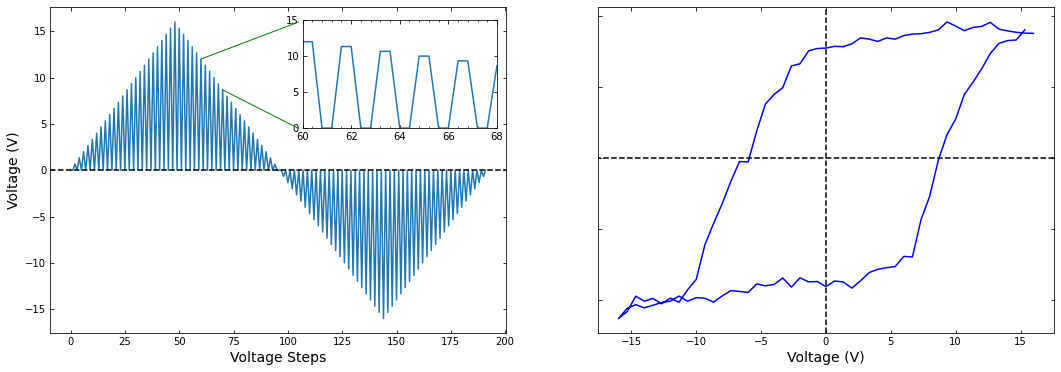

In [45]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=2)
hysteresis_waveform = spectroscopic_values[1, ::165][192:] * spectroscopic_values[2, ::165][192:]
x_start = 120
x_end = 140

axs[0].plot(hysteresis_waveform)
ax_new = fig.add_axes([0.32, 0.6, 0.15, 0.25])
ax_new.plot(np.repeat(hysteresis_waveform, 2))
ax_new.set_xlim(x_start, x_end)
ax_new.set_ylim(0, 15)
ax_new.set_xticks(np.arange(x_start, x_end), 2)
ax_new.set_xticklabels([60, 62, 64, 66, 68, 70]) 
fig.add_artist(ConnectionPatch(xyA=(x_start//2, hysteresis_waveform[x_start//2]), coordsA=axs[0].transData, xyB=(105, 16), coordsB=axs[0].transData, color='green'))
fig.add_artist(ConnectionPatch(xyA=(x_end//2, hysteresis_waveform[x_end//2]), coordsA=axs[0].transData, xyB=(105, 4.5), coordsB=axs[0].transData, color='green'))
axs[0].set_xlabel('Voltage Steps')
axs[0].set_ylabel('Voltage (V)')

i = np.random.randint(0,num_pix_1d,2)
axs[1].plot(V, proj_nd_shifted_transposed[i[0], i[1], :, 3],'blue')
axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[1].set(xlabel='Voltage (V)', ylabel='Amplitude (Arb. U.)');
axs[1].label_outer()

axs[0].axhline(y=0, xmax=200, linestyle='--', color='black')
axs[1].axhline(y=0, xmin=-16, xmax=16, linestyle='--', color='black')
axs[1].axvline(x=0, linestyle='--', color='black')

plt.savefig('Assets/Figures/hysteresis_waveform_stacked.png', bbox_inches='tight', pad_inches=1)
plt.savefig('Assets/Figures/hysteresis_waveform_stacked.svg', bbox_inches='tight', pad_inches=1)

### Test the Tensorflow function

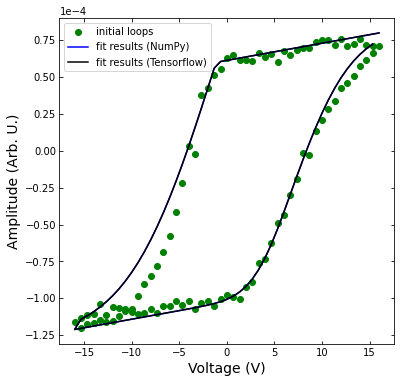

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
i = np.random.randint(0,num_pix_1d,2)
axs.plot(V, proj_nd_shifted_transposed[i[0], i[1], :, 3],'og',
         label='initial loops')
axs.plot(V, loop_fit_results[:, i[0], i[1]], 'blue', label='fit results (NumPy)')
axs.plot(V, np.reshape(loop_fitting_function_tf(func_type, V, params), 
                       (num_pix_1d, num_pix_1d, 96))[i[0], i[1], :], 'black', 
         label='fit results (Tensorflow)')
axs.legend();
axs.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs.set(xlabel='Voltage (V)', ylabel='Amplitude (Arb. U.)');
axs.label_outer()

## Data Preprocessing

In [47]:
real_loops = clean_interpolate(proj_nd_shifted_transposed[:, :, :, 3].reshape(num_pix,-1)).astype(np.float64)
real_loops_scaler = global_scaler()
real_scaled_loops = real_loops_scaler.fit_transform(real_loops).astype(np.float64)

In [48]:
real_parms_scaler = StandardScaler()
real_parms_scaled = real_parms_scaler.fit_transform(params)

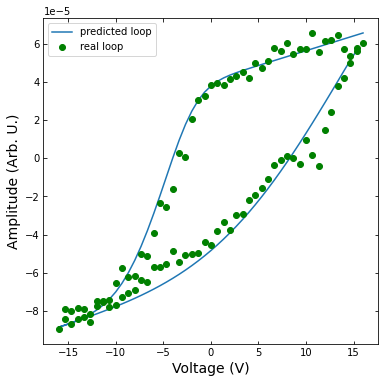

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
n = np.random.randint(0,num_pix)

params_ = real_parms_scaler.inverse_transform(real_parms_scaled[n].reshape(1, -1))
loop_pred = loop_fitting_function_tf(func_type, V, np.atleast_2d(params_))

axs.plot(V, np.asarray(loop_pred[0]), label='predicted loop')
axs.plot(V, real_loops[n],'og', label='real loop')
axs.set(xlabel='Voltage (V)', ylabel='Amplitude (Arb. U.)');
axs.legend();
axs.label_outer()

In [50]:
# getting mean and std of parameters
params_mean = real_parms_scaler.mean_
params_std = np.sqrt(real_parms_scaler.var_)

data_mean = real_loops_scaler.mean.astype(np.float64)
data_std = real_loops_scaler.std.astype(np.float64)

## Neural Network Architecture

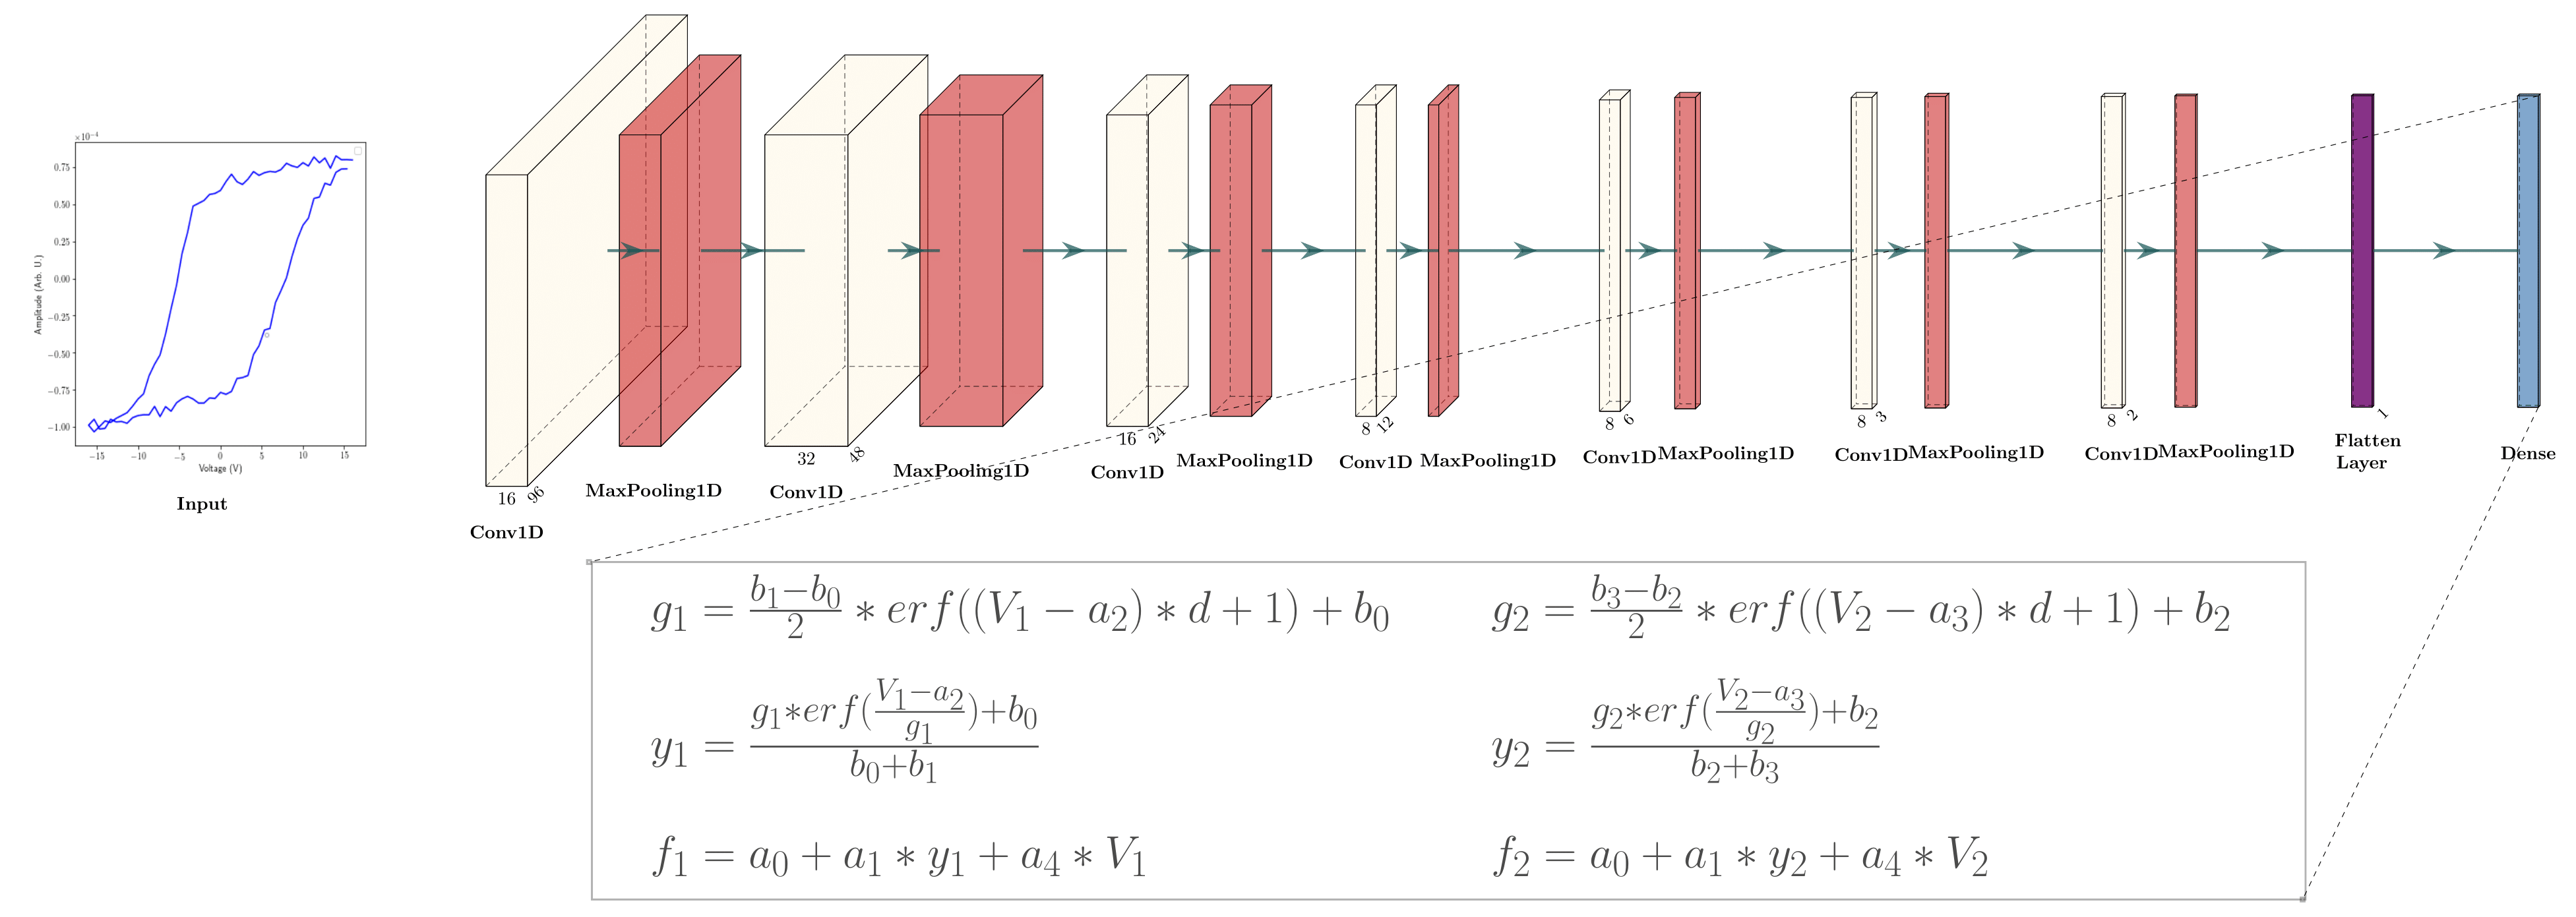

In [51]:
Image(filename='Assets/Figures/model_architecture_hysteresis.png')

In [52]:
def loop_fitting_function_torch(type, V, y):

    if(type == '9 parameters'):
        a0 = y[:, 0].type(torch.float64)
        a1 = y[:, 1].type(torch.float64)
        a2 = y[:, 2].type(torch.float64)
        a3 = y[:, 3].type(torch.float64)
        a4 = y[:, 4].type(torch.float64)
        b0 = y[:, 5].type(torch.float64)
        b1 = y[:, 6].type(torch.float64)
        b2 = y[:, 7].type(torch.float64)
        b3 = y[:, 8].type(torch.float64)
        d = 1000
        V1 = torch.tensor(V[:int(len(V) / 2)]).cuda()
        V2 = torch.tensor(V[int(len(V) / 2):]).cuda()

        g1 = (b1 - b0) / 2 * (torch.erf((V1 - a2) * d) + 1) + b0
        g2 = (b3 - b2) / 2 * (torch.erf((V2 - a3) * d) + 1) + b2

        y1 = (g1 * torch.erf((V1 - a2) / g1) + b0) / (b0 + b1)
        y2 = (g2 * torch.erf((V2 - a3) / g2) + b2) / (b2 + b3)

        f1 = a0 + a1 * y1 + a4 * V1
        f2 = a0 + a1 * y2 + a4 * V2

        loop_eval = torch.transpose(torch.cat((f1, f2), axis=0), 1, 0)
        return loop_eval
    elif(type == '13 parameters'):
        a1 = y[:, 0].type(torch.float64)
        a2 = y[:, 1].type(torch.float64)
        a3 = y[:, 2].type(torch.float64)
        b1 = y[:, 3].type(torch.float64)
        b2 = y[:, 4].type(torch.float64)
        b3 = y[:, 5].type(torch.float64)
        b4 = y[:, 6].type(torch.float64)
        b5 = y[:, 7].type(torch.float64)
        b6 = y[:, 8].type(torch.float64)
        b7 = y[:, 9].type(torch.float64)
        b8 = y[:, 10].type(torch.float64)
        Au = y[:, 11].type(torch.float64)
        Al = y[:, 12].type(torch.float64)

        # See supporting information for more information about the form of this function
        S1 = ((b1 + b2) / 2) + ((b2 - b1) / 2) * torch.erf((V - b7) / b5)
        S2 = ((b4 + b3) / 2) + ((b3 - b4) / 2) * torch.erf((V - b8) / b6)
        Branch1 = (a1 + a2) / 2 + ((a2 - a1) / 2) * \
            torch.erf((V - Au) / S1) + a3 * V
        Branch2 = (a1 + a2) / 2 + ((a2 - a1) / 2) * \
            torch.erf((V - Al) / S2) + a3 * V

        return torch.squeeze(torch.cat((Branch1, torch.flipud(Branch2)), axis=0))
    else:
        print('No such parameters')
        return None

In [73]:
ACTIVATION = tf.nn.leaky_relu

def Conv1D_Block(X, time_step, kernel_size):
    x = Conv1D(time_step, kernel_size, padding='same')(X)
    x = Activation(ACTIVATION)(x)      
    return x

def Conv1D_Pie(kernel_size = 3, n_step = 96):
    X_input = layers.Input(shape=(n_step, 1))
    x = X_input
    
    x = Conv1D_Block(x, 16, kernel_size)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D_Block(x, 32, kernel_size)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D_Block(x, 16, kernel_size)
    x = MaxPooling1D(2, padding='same')(x)
    
    time_step = 8 
    
    x = Conv1D_Block(x, time_step, kernel_size)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D_Block(x, time_step, kernel_size)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D_Block(x, time_step, kernel_size)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D_Block(x, time_step, kernel_size)
    x = MaxPooling1D(2, padding='same')(x)
    
    encoded = Flatten()(x)
    
    embedding = Dense(9, activation='linear')(encoded)
    embedding = tf.cast(embedding, dtype='float64')
    
    unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                            tf.convert_to_tensor(params_mean))
    scaled_loops = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                            tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))

    model = Model(X_input, scaled_loops, name = 'Convolutional_1D_with_Attention')
    
    return model

In [74]:
model_tf = Conv1D_Pie()

In [79]:
for i,l in enumerate(model_tf.layers):
    print(i,l)

0 <keras.engine.input_layer.InputLayer object at 0x7f1157ce2190>
1 <keras.layers.convolutional.Conv1D object at 0x7f1157ce2890>
2 <keras.layers.core.activation.Activation object at 0x7f1157ce2c90>
3 <keras.layers.pooling.MaxPooling1D object at 0x7f1157cb2fd0>
4 <keras.layers.convolutional.Conv1D object at 0x7f1157cafb90>
5 <keras.layers.core.activation.Activation object at 0x7f1158c39e10>
6 <keras.layers.pooling.MaxPooling1D object at 0x7f1157cd79d0>
7 <keras.layers.convolutional.Conv1D object at 0x7f1158c2d290>
8 <keras.layers.core.activation.Activation object at 0x7f1158c2bad0>
9 <keras.layers.pooling.MaxPooling1D object at 0x7f1157cbee10>
10 <keras.layers.convolutional.Conv1D object at 0x7f1157cd7190>
11 <keras.layers.core.activation.Activation object at 0x7f1157ccd190>
12 <keras.layers.pooling.MaxPooling1D object at 0x7f1157ca5590>
13 <keras.layers.convolutional.Conv1D object at 0x7f115c123a90>
14 <keras.layers.core.activation.Activation object at 0x7f1157cd87d0>
15 <keras.layers.p

In [59]:
class Pie_Model(nn.Module):
    def __init__(self):
        super().__init__()

        # Input block of 1d convolution
        self.hidden_x1 = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(kernel_size=2, padding=1),
            nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(kernel_size=2, padding=1),
            nn.Conv1d(in_channels=32, out_channels=16, kernel_size=3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(kernel_size=2, padding=1),
            
            nn.Conv1d(in_channels=16, out_channels=8, kernel_size=3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(kernel_size=2, padding=1),
            nn.Conv1d(in_channels=8, out_channels=8, kernel_size=3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(kernel_size=2, padding=1),
            nn.Conv1d(in_channels=8, out_channels=8, kernel_size=3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(kernel_size=2, padding=1),
            nn.Conv1d(in_channels=8, out_channels=8, kernel_size=3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool1d(kernel_size=2, padding=1),
        )

        # Flatten layer
        self.flatten_layer = nn.Flatten()
        
        # Final embedding block - Output 9 values - linear
        self.hidden_embedding = nn.Sequential(
            nn.Linear(16, 9),
            nn.LeakyReLU(),
        )

    def forward(self, x, n=-1):
      x = torch.unsqueeze(x, 1)
      x = self.hidden_x1(x)
      encoded = self.flatten_layer(x)
      embedding = self.hidden_embedding(encoded)
      unscaled_param = embedding*torch.tensor(params_std).cuda() \
                              + torch.tensor(params_mean).cuda()
      return unscaled_param

In [60]:
model = Pie_Model().cuda()

In [61]:
print(model)

Pie_Model(
  (hidden_x1): Sequential(
    (0): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool1d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (3): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): LeakyReLU(negative_slope=0.01)
    (5): MaxPool1d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (6): Conv1d(32, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): LeakyReLU(negative_slope=0.01)
    (8): MaxPool1d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (9): Conv1d(16, 8, kernel_size=(3,), stride=(1,), padding=(1,))
    (10): LeakyReLU(negative_slope=0.01)
    (11): MaxPool1d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (12): Conv1d(8, 8, kernel_size=(3,), stride=(1,), padding=(1,))
    (13): LeakyReLU(negative_slope=0.01)
    (14): MaxPool1d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=Fal

In [63]:
model_parameters_adahessian = Pie_Model().cuda()
model_parameters_adahessian = torch.load(f'./Trained Models/Piezoresponse/model_AdaHessian_bs_128_seed_10.pt')

# prediction of parameters
batch_size = 100000
train_dataloader = DataLoader(real_scaled_loops, batch_size=batch_size)

num_elements = len(train_dataloader.dataset)
num_batches = len(train_dataloader)
test_pred_params = torch.zeros_like(torch.tensor(params))

start_time_inference = time.time()

for i, train_batch in enumerate(train_dataloader):
  start = i*batch_size
  end = start + batch_size

  if i == num_batches - 1:
    end = num_elements

  pred_batch = model_parameters_adahessian(train_batch.double().cuda())
  test_pred_params[start:end] = pred_batch.cpu().detach()

  del pred_batch
  del train_batch
  torch.cuda.empty_cache()

scaled_loops_adahessian = (loop_fitting_function_torch(func_type, V, test_pred_params.cuda()) - torch.tensor(data_mean).cuda()) / torch.tensor(data_std).cuda()
scaled_params_adahessian = (test_pred_params.cuda() - torch.tensor(params_mean).cuda()) / torch.tensor(params_std).cuda()

In [65]:
model_parameters_adam = Pie_Model().cuda()
model_parameters_adam = torch.load(f'./Trained Models/Piezoresponse/model_Adam_bs_64_seed_4.pt')

# prediction of parameters
batch_size = 100000
train_dataloader = DataLoader(real_scaled_loops, batch_size=batch_size)

num_elements = len(train_dataloader.dataset)
num_batches = len(train_dataloader)
test_pred_params = torch.zeros_like(torch.tensor(params))

start_time_inference = time.time()

for i, train_batch in enumerate(train_dataloader):
  start = i*batch_size
  end = start + batch_size

  if i == num_batches - 1:
    end = num_elements

  pred_batch = model_parameters_adam(train_batch.double().cuda())
  test_pred_params[start:end] = pred_batch.cpu().detach()

  del pred_batch
  del train_batch
  torch.cuda.empty_cache()

scaled_loops_adam = (loop_fitting_function_torch(func_type, V, test_pred_params.cuda()) - torch.tensor(data_mean).cuda()) / torch.tensor(data_std).cuda()
scaled_params_adam = (test_pred_params.cuda() - torch.tensor(params_mean).cuda()) / torch.tensor(params_std).cuda()

In [80]:
tf.random.set_seed(42)
tf.keras.backend.set_floatx('float64')

model_tf = Conv1D_Pie()
model_tf.compile(optimizer=Adam(0.00001), loss='mse')
FVAL = []

# getting intermediate layer
earlyPredictor = tf.keras.Model(model_tf.inputs, model_tf.layers[23].output)

embedding = real_parms_scaled
unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                    tf.convert_to_tensor(params_mean))
scaled_loops_ = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                    tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))


tf.reduce_mean(tf.abs(scaled_loops_ - real_scaled_loops))

<tf.Tensor: shape=(), dtype=float64, numpy=0.07009600166556872>

In [81]:
np.random.seed(42)

cgopttol = 1e-7
c0tr = 0.2
c1tr = 0.25
c2tr = 0.75  # when to accept
t1tr = 0.75
t2tr = 2.0
radius_max = 5.0  # max radius
radius_initial = 1.0
radius = radius_initial

optimizer = TRPCGOptimizerv2(model_tf, radius_initial, 0)
print("d = ", optimizer.d)
allsamples=[i for i in range(num_pix)]

st = time.time()

for epoch in range(1000):

    np.random.shuffle(allsamples)
    BS = 1024

    for it in range(num_pix//BS):

      # dividing into batches
      x = real_scaled_loops[allsamples[it*BS:(it+1)*BS]]
      y = real_scaled_loops[allsamples[it*BS:(it+1)*BS]]

      # model optimization
      loss, d, rho, update, cg_iter, cg_term, loss_grad, norm_d, numerator, denominator, rad = \
      optimizer.step(x,y)
      
      # predicting the intermediate layer and passing to empirical function
      parm_pred = earlyPredictor.predict(real_scaled_loops)
      embedding = parm_pred
      unscaled_param = tf.add(tf.multiply(embedding, tf.convert_to_tensor(params_std)),\
                          tf.convert_to_tensor(params_mean))
      scaled_loops_DNN = tf.divide(tf.subtract(loop_fitting_function_tf(func_type, V, unscaled_param), \
                          tf.convert_to_tensor(data_mean)), tf.convert_to_tensor(data_std))

      # calculating the reconstruction loss
      err = tf.reduce_mean(tf.abs(scaled_loops_DNN - real_scaled_loops)).numpy()
      FVAL.append([loss.numpy(), err])
      print(epoch, time.time()-st, "sec", FVAL[-1], cg_iter, optimizer.radius)
      
      if(optimizer.radius < 1e-15):
          break

    if(time.time() - st > 300):
        break;

d =  4257
0 5.645010709762573 sec [0.08375829045869501, 0.2251099179949798] 2 1.0
0 6.0675342082977295 sec [0.08365193797949588, 0.22034886900807743] 1 2.0
rejecting .... radius: 5.000000e-01   FVALNew 7.482719e-02,  DeltaF -5.251446e+00 
rejecting .... radius: 1.250000e-01   FVALNew 7.482719e-02,  DeltaF -3.309892e-02 
0 7.115360498428345 sec [0.07482719062956371, 0.2127377646332975] 1 0.25
1 7.6404218673706055 sec [0.0696942101072556, 0.2132160526523216] 1 0.5
rejecting .... radius: 1.250000e-01   FVALNew 7.166242e-02,  DeltaF -2.777784e-02 
1 8.429574966430664 sec [0.07166242151733243, 0.20936026205183786] 2 0.25
rejecting .... radius: 6.250000e-02   FVALNew 6.775709e-02,  DeltaF -2.091752e-04 
1 9.160108804702759 sec [0.06775708804361003, 0.2052554449609242] 2 0.125
rejecting .... radius: 3.125000e-02   FVALNew 6.703282e-02,  DeltaF -4.374870e-03 
2 9.950041055679321 sec [0.06703281740059515, 0.20772496268267207] 2 0.03125
2 10.43583869934082 sec [0.06740443439291102, 0.20350447682

In [82]:
scaled_loops_tcrg = scaled_loops_DNN

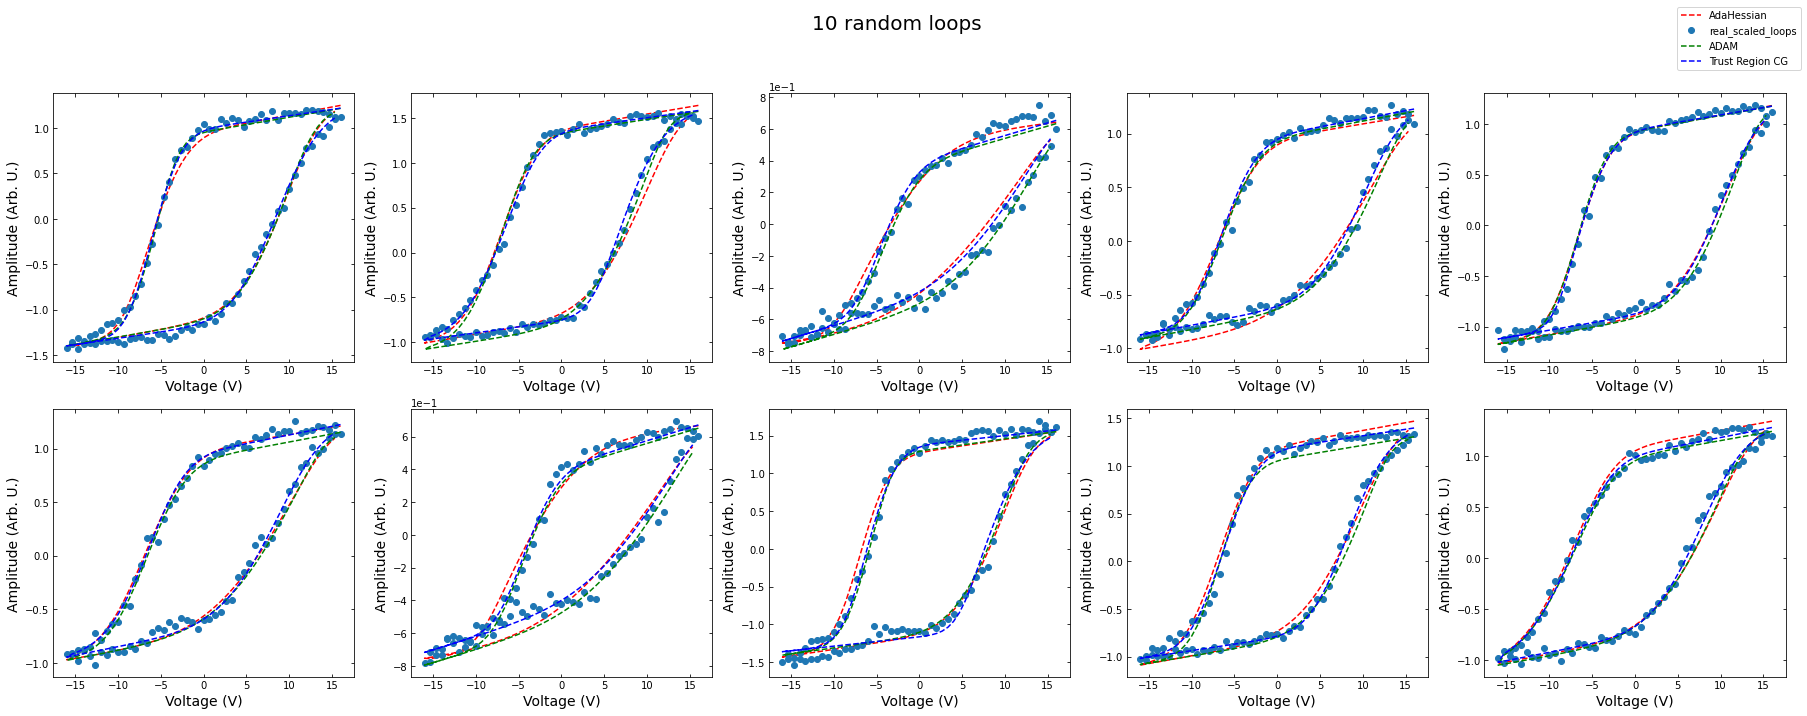

In [108]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

plt.suptitle('10 random loops', fontsize=20)

for x in range(2):
  for y in range(5):
    i = np.random.randint(0, scaled_loops_tcrg.shape[0])

    axs[x, y].plot(V, scaled_loops_adahessian[i].cpu().detach(),'r--',label='AdaHessian')
    axs[x, y].plot(V, real_scaled_loops[i], 'o', label='real_scaled_loops')
    axs[x, y].plot(V, scaled_loops_adam[i].cpu().detach(),'g--',label='ADAM')
    axs[x, y].plot(V, scaled_loops_tcrg[i],'b--',label='Trust Region CG')
    axs[x, y].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    axs[x, y].set(xlabel='Voltage (V)', ylabel='Amplitude (Arb. U.)');

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 2.5), loc='upper right', borderaxespad=0.)
fig.subplots_adjust(top=0.87)